# Problem Set 1 - Part 3 (VG): Logic and Lambda Calculus

## Introduction

This lab should be completed individually.

Write all your answers and the code in the appropriate boxes below.

In this lab we will look at further extending the grammar that you have done in Question 4 of `problem-set-1-part-2.ipynb` to cover three additional contructions. Below is the original grammar from the NLTK book. Copy and paste your extensions at the end to create a string `fcfg_string0`.

In [1]:
# This task needs NLTK and Jupyter Notebook (IPython package).
import nltk
from nltk.grammar import FeatureGrammar
from utils import display_latex, display_translation, display_tree, display, Markdown

In [2]:
fcfg_string_orginal = r"""
% start S
############################
# Grammar Rules
#############################

S[SEM = <?subj(?vp)>] -> NP[NUM=?n,SEM=?subj] VP[NUM=?n,SEM=?vp]

NP[NUM=?n,SEM=<?det(?nom)> ] -> Det[NUM=?n,SEM=?det]  Nom[NUM=?n,SEM=?nom]
NP[LOC=?l,NUM=?n,SEM=?np] -> PropN[LOC=?l,NUM=?n,SEM=?np]

Nom[NUM=?n,SEM=?nom] -> N[NUM=?n,SEM=?nom]

VP[NUM=?n,SEM=?v] -> IV[NUM=?n,SEM=?v]
VP[NUM=?n,SEM=<?v(?obj)>] -> TV[NUM=?n,SEM=?v] NP[SEM=?obj]
VP[NUM=?n,SEM=<?v(?obj,?pp)>] -> DTV[NUM=?n,SEM=?v] NP[SEM=?obj] PP[+TO,SEM=?pp]

PP[+TO, SEM=?np] -> P[+TO] NP[SEM=?np]

#############################
# Lexical Rules
#############################

PropN[-LOC,NUM=sg,SEM=<\P.P(angus)>] -> 'Angus'
PropN[-LOC,NUM=sg,SEM=<\P.P(cyril)>] -> 'Cyril'
PropN[-LOC,NUM=sg,SEM=<\P.P(irene)>] -> 'Irene'
 
Det[NUM=sg,SEM=<\P Q.all x.(P(x) -> Q(x))>] -> 'every'
Det[NUM=pl,SEM=<\P Q.all x.(P(x) -> Q(x))>] -> 'all'
Det[SEM=<\P Q.exists x.(P(x) & Q(x))>] -> 'some'
Det[NUM=sg,SEM=<\P Q.exists x.(P(x) & Q(x))>] -> 'a'
Det[NUM=sg,SEM=<\P Q.exists x.(P(x) & Q(x))>] -> 'an'

N[NUM=sg,SEM=<\x.man(x)>] -> 'man'
N[NUM=sg,SEM=<\x.girl(x)>] -> 'girl'
N[NUM=sg,SEM=<\x.boy(x)>] -> 'boy'
N[NUM=sg,SEM=<\x.bone(x)>] -> 'bone'
N[NUM=sg,SEM=<\x.ankle(x)>] -> 'ankle'
N[NUM=sg,SEM=<\x.dog(x)>] -> 'dog'
N[NUM=pl,SEM=<\x.dog(x)>] -> 'dogs'

IV[NUM=sg,SEM=<\x.bark(x)>,TNS=pres] -> 'barks'
IV[NUM=pl,SEM=<\x.bark(x)>,TNS=pres] -> 'bark'
IV[NUM=sg,SEM=<\x.walk(x)>,TNS=pres] -> 'walks'
IV[NUM=pl,SEM=<\x.walk(x)>,TNS=pres] -> 'walk'
TV[NUM=sg,SEM=<\X x.X(\y.chase(x,y))>,TNS=pres] -> 'chases'
TV[NUM=pl,SEM=<\X x.X(\y.chase(x,y))>,TNS=pres] -> 'chase'
TV[NUM=sg,SEM=<\X x.X(\y.see(x,y))>,TNS=pres] -> 'sees'
TV[NUM=pl,SEM=<\X x.X(\y.see(x,y))>,TNS=pres] -> 'see'
TV[NUM=sg,SEM=<\X x.X(\y.bite(x,y))>,TNS=pres] -> 'bites'
TV[NUM=pl,SEM=<\X x.X(\y.bite(x,y))>,TNS=pres] -> 'bite'
DTV[NUM=sg,SEM=<\Y X x.X(\z.Y(\y.give(x,y,z)))>,TNS=pres] -> 'gives'
DTV[NUM=pl,SEM=<\Y X x.X(\z.Y(\y.give(x,y,z)))>,TNS=pres] -> 'give'

P[+to] -> 'to'
"""

fcfg_string0 = fcfg_string_orginal + r"""
## Your answers from problem-set-1-part-2-question-4 
X -> 'cat'
X -> 'no'
"""

## 1. Adjectives

Adjectives can be assigned to different classes depending on their meaning (for example see [(Partee, 2003)](https://www.semanticsarchive.net/Archive/TFlNWIzO/AreTherePrivatives.pdf)). Here are some examples:

- a man gave a white bone to a dog 
- a man gave a perfect bone to a dog 
- a man gave a fake bone to a dog 
- a man gave a questionable bone to a dog 

First, *white* and *perfect* are **subsective** because {A N} $\subseteq$ {N}. However, there is a further distinction:
  - *white* is **intersective**: {x | x is "white bone"} = {x | x is "white"} $\cap$ {x | x is "bone"};
  - *perfect* is **relative** or **not intersective**: *perfect* is not an independent property sharable between sets - "white bone" and "white table" share the same property of being *white* but "perfect bone" and "perfect table" are different kinds of *perfect-something*, hence "perfect" requires a specific comparison set.
  

Second, *fake* and *questionable* are **non-subsective** because {A N} $\neq$ {A} $\cap$ {N}. Again, there is a further distinction where:
  - *fake* is **privative**: {x | x is "fake bone"} $\cap$ {x | x is "bone"} = $\emptyset$.
  - *questionable* is **not privative**: {x | x is "questionable bone"} $\cap$ {x | x is "bone"} $\neq$ $\emptyset$.

In the group assignment we have looked at **intersective** adjectives and here we will add the coverage of **private** adjectives. Extend your grammar to cover *fake* so that the semantic representation for *fake N* will be as follows:

1. Negation: an entity does not have the property of being *N* .
2. There exsisting a similar entity: there is an entity described by *N* such that that the entity *fake N* looks like it but it not that thing.

Your grammar should cover the following examples **[5 marks]**:
- no man give a fake bone to a dog
- a boy sees a fake cat

In [3]:
fcfg_string_adjs = r"""
## Your extended answer here
X -> 'fake'
"""

## 2. Definite article

Extend your grammar to cover the definite article *the* in the following example **[2 marks]**. *Hint*: you might find an answer in the readings.

-  a cat chases the dog


In [4]:
fcfg_string_det = r"""
## Your extended answer here
X -> 'the'
"""

## 3. Spatial prepositions

Some prepositions such as *on* are used in spatial relations where we might want to represent them with the similar semantics as intersective adjectives. Extend your grammar to cover the following example **[5 marks]**:

-  a boy sees a bone on a table



In [5]:
fcfg_string_pps = r"""
## Your extended answer here
X -> 'on'
X -> 'table'
"""

## 4. Plurals

In the original grammar above there is a lexical entry for *dogs*. However, the grammar does not correctly parse sentences such as

- dogs bark

Why? **[1 mark]**

*Your answer here*

Here is a possible extension for our grammar:

In [6]:
fcfg_string_pl = r"""
NP[NUM=pl,SEM=<\Q.exists x.(?nom(x) & Q(x))> ] -> Nom[NUM=pl,SEM=?nom]
"""

However, this does not give us quite a semantically intuitive interpretation of the sentence. In fact, Discuss what is the issue. **[2 marks]**

*Write your answer here*

## Parser code

The code to run all your examples:

----

$\exists\ x.(dog(x)\ \land\ bark(x))$

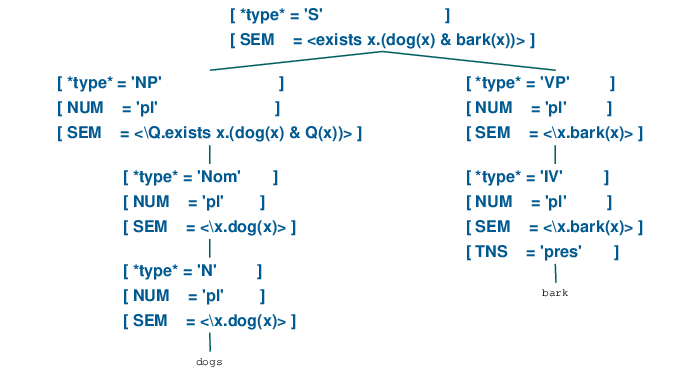

In [7]:
fcfg_string = fcfg_string0 + fcfg_string_adjs + fcfg_string_det + fcfg_string_pps + fcfg_string_pl

# Load `fcfg_string` as a feature grammar:
syntax = FeatureGrammar.fromstring(fcfg_string)

# remove sentences if you couldn't find answer for them
sentences = [
    'no man give a fake bone to a dog',
    'a boy sees a fake cat',
    'a cat chases the dog',
    'a boy sees a bone on a table',
    'dogs bark'
]

for results in nltk.interpret_sents(sentences, syntax):
    for (synrep, semrep) in results:
        display(Markdown('----'))
        display_latex(semrep) # prints the SEM feature of a tree
        display_tree(synrep) # show the parse tree

## Marks

This part of the assignment has a total of 15 marks.